<div style="text-align:center;">
    <h1>Data-driven Estimation of Pharmacological Prescription Duration using Python</h1>
    <h3>Assignment 3 - Implementation and EDA</h3>
    <h4>Authors:</h4>
    <ul style="list-style:none;">
        <li>👤 Elgen Mar Arinasa</li>
        <li>👤 Shawn Jurgen Mayol</li>
    </ul>
    <hr>
</div>


<h2 style="color:#4B0082;">📖 Introduction</h2>
<p>
    Accurate estimation of prescription durations is critical in pharmacoepidemiological research to assess medication adherence, efficacy, and patient safety. Due to missing or imprecise data, innovative methods like the Sessa Empirical Estimator (SEE) using clustering techniques become valuable. This notebook will demonstrate initial preprocessing and exploratory analysis steps on the provided dataset (<code>medeventsATC.csv</code>) prior to applying clustering methods such as K-Means and DBSCAN in SEE.
</p>


<h2 style="color:#4B0082;">🎯 Objectives</h2>
<p>This notebook aims to accomplish the following tasks comprehensively:</p>
<ol>
    <li><strong>Load and inspect</strong> the provided dataset for preliminary insights.</li>
    <li><strong>Clean and preprocess</strong> the dataset to prepare for robust analysis.</li>
    <li>Conduct thorough <strong>Exploratory Data Analysis (EDA)</strong> to understand data patterns and distributions clearly.</li>
    <li><strong>Implement</strong> the <em>Sessa Empirical Estimator (SEE)</em> using <strong>K-Means clustering</strong>.</li>
    <li><strong>Implement</strong> the <em>Sessa Empirical Estimator (SEE)</em> using <strong>DBSCAN clustering</strong> as an alternative approach.</li>
    <li><strong>Perform comparative analyses and visualizations</strong> to evaluate and interpret the effectiveness of both clustering techniques.</li>
    <li><strong>Provide comprehensive conclusions, insights, and a detailed discussion</strong> of findings, highlighting the strengths and weaknesses of the clustering methodologies used.</li>
</ol>


<h2 style="color:#4B0082;">📚 Import Required Libraries</h2>
<p>We begin by importing all necessary libraries for data handling, visualization, and machine learning.</p>


In [13]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import os


<h2 style="color:#4B0082;">📂 Data Loading and Initial Inspection</h2>
<p>First, we load the provided dataset and perform basic inspection to understand its structure and contents.</p>


In [14]:
import pandas as pd

# Load dataset
data = pd.read_csv('medeventsATC.csv')

# Quick inspection
print("Dataset Dimensions:", data.shape)
data.head()


Dataset Dimensions: (1564, 7)


,PATIENT_ID,DATE,DURATION,PERDAY,CATEGORY,CATEGORY_L1,CATEGORY_L2
0,1,2057-09-04,28.000000,20.0,A02BC02,ALIMENTARY TRACT AND METABOLISM,DRUGS FOR ACID RELATED DISORDERS
1,1,2058-06-03,28.000000,20.0,A02BC02,ALIMENTARY TRACT AND METABOLISM,DRUGS FOR ACID RELATED DISORDERS
2,1,2058-07-09,28.000000,20.0,A02BC02,ALIMENTARY TRACT AND METABOLISM,DRUGS FOR ACID RELATED DISORDERS
3,1,2056-10-09,41.666667,36000.0,A09AA02,ALIMENTARY TRACT AND METABOLISM,"DIGESTIVES, INCL. ENZYMES"
4,1,2056-12-10,40.000000,36000.0,A09AA02,ALIMENTARY TRACT AND METABOLISM,"DIGESTIVES, INCL. ENZYMES"


<h2 style="color:#4B0082;">🛠️ Data Preprocessing</h2>
<p>We preprocess the data by handling missing values, converting date formats, and ensuring correct data types.</p>


In [15]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)

# Convert DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Drop critical missing entries
data.dropna(subset=['PATIENT_ID', 'DATE', 'DURATION', 'CATEGORY'], inplace=True)

# Verify data types after cleaning
data.info()


PATIENT_ID     0
DATE           0
DURATION       0
PERDAY         0
CATEGORY       0
CATEGORY_L1    0
CATEGORY_L2    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PATIENT_ID   1564 non-null   int64         
 1   DATE         1564 non-null   datetime64[ns]
 2   DURATION     1564 non-null   float64       
 3   PERDAY       1564 non-null   float64       
 4   CATEGORY     1564 non-null   object        
 5   CATEGORY_L1  1564 non-null   object        
 6   CATEGORY_L2  1564 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 85.7+ KB


 <h4> Detailed statistics for Dosage Per Day </h4>

In [25]:
# Detailed statistics for Dosage Per Day
data['PERDAY'].describe()


count    1.564000e+03
mean     1.079554e+05
std      3.688593e+05
min      6.666667e-02
25%      1.000000e+02
50%      6.000000e+02
75%      3.333333e+03
max      8.000000e+06
Name: PERDAY, dtype: float64

 <h4>Detailed statistics for Medication Duration</h4>

In [22]:
# Detailed statistics for Medication Duration
data['DURATION'].describe()

count    1564.000000
mean       38.339786
std        33.581154
min         2.000000
25%        28.000000
50%        30.000000
75%        35.377358
max       400.000000
Name: DURATION, dtype: float64

<h2 style="color:#4B0082;">🔍 Exploratory Data Analysis (EDA)</h2>
<p>
    The purpose of EDA is to discover patterns, detect anomalies, and validate data assumptions through statistical summaries and visualizations.
</p>


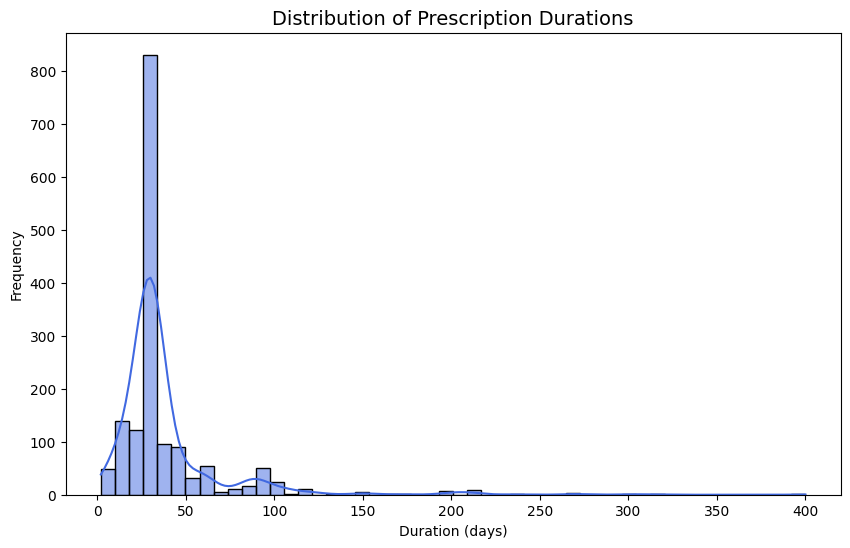

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data['DURATION'], bins=50, kde=True, color='royalblue')
plt.title('Distribution of Prescription Durations', fontsize=14)
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()


<h2 style="color:#4B0082;">Visualization: Distribution of Medication Dosage (PERDAY): </h2>

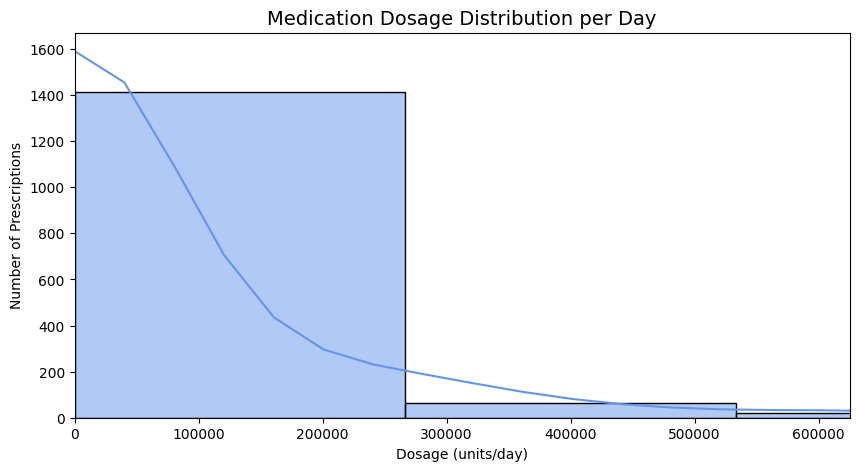

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data['PERDAY'], bins=30, kde=True, color='cornflowerblue')
plt.title('Medication Dosage Distribution per Day', fontsize=14)
plt.xlabel('Dosage (units/day)')
plt.ylabel('Number of Prescriptions')
plt.xlim(0, data['PERDAY'].quantile(0.95))  # limited to 95th percentile for better visualization
plt.show()


<h4>📊 Trend Analysis of Medication Prescriptions Over Time (Yearly) </h4>

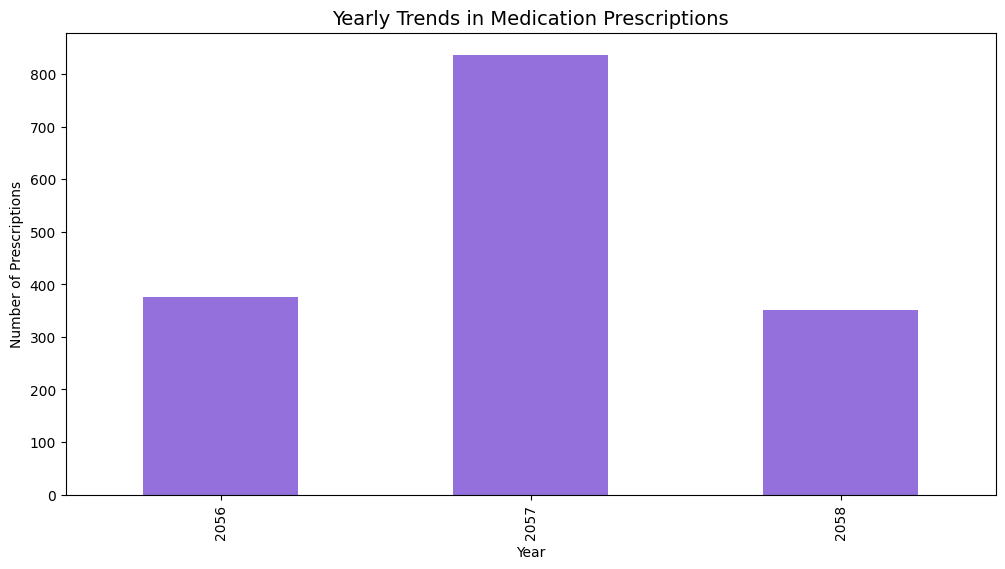

In [33]:
data['DATE'] = pd.to_datetime(data['DATE'])
plt.figure(figsize=(12, 6))
data['DATE'].dt.year.value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Yearly Trends in Medication Prescriptions', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Prescriptions')
plt.show()


<h3 style="color:#00008B;">💊 Prescription Counts by Medication Category (CATEGORY_L1)</h3>
<p>Analyzing prescription frequency by primary medication category to understand prescription trends.</p>


C:\Users\subar\AppData\Local\Temp\ipykernel_20064\3647975195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CATEGORY_L1', data=data, order=data['CATEGORY_L1'].value_counts().index, palette='viridis')


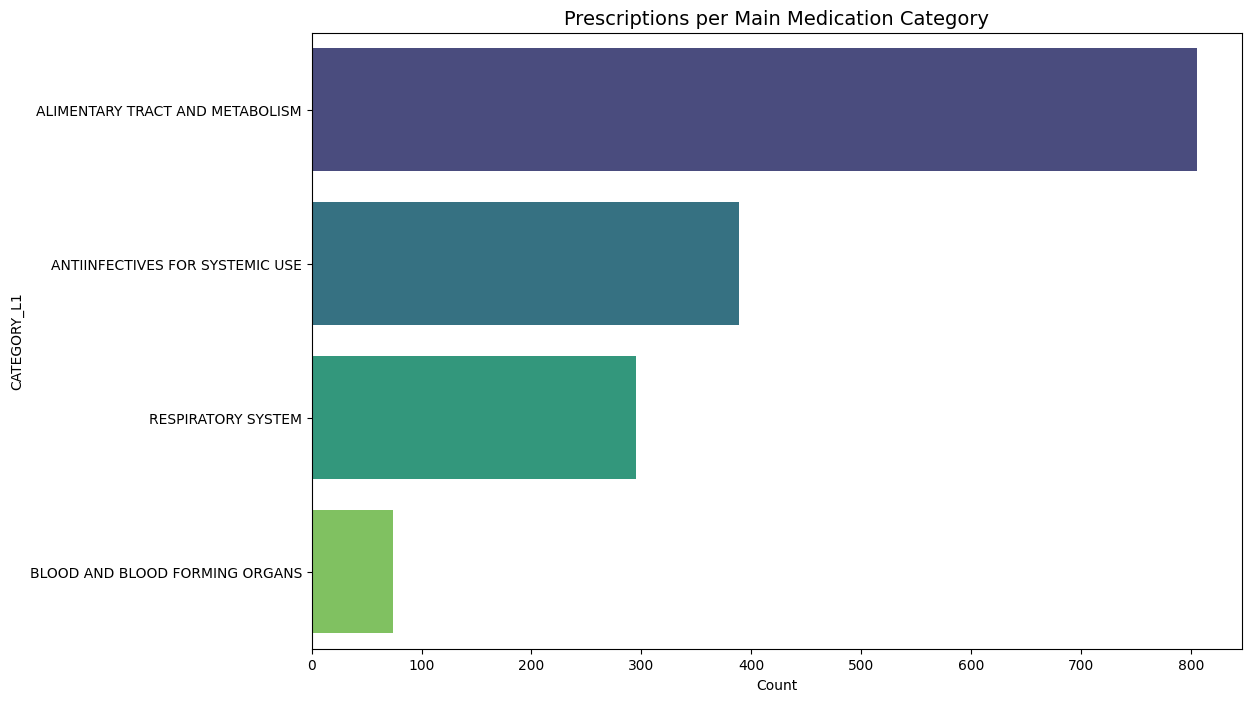

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(y='CATEGORY_L1', data=data, order=data['CATEGORY_L1'].value_counts().index, palette='viridis')
plt.title('Prescriptions per Main Medication Category', fontsize=14)
plt.xlabel('Count')
plt.ylabel('CATEGORY_L1')
plt.show()


<h3 style="color:#00008B;">📅 Temporal Patterns of Prescriptions</h3>
<p>Examining monthly trends to detect seasonal patterns or temporal shifts in prescription frequency.</p>


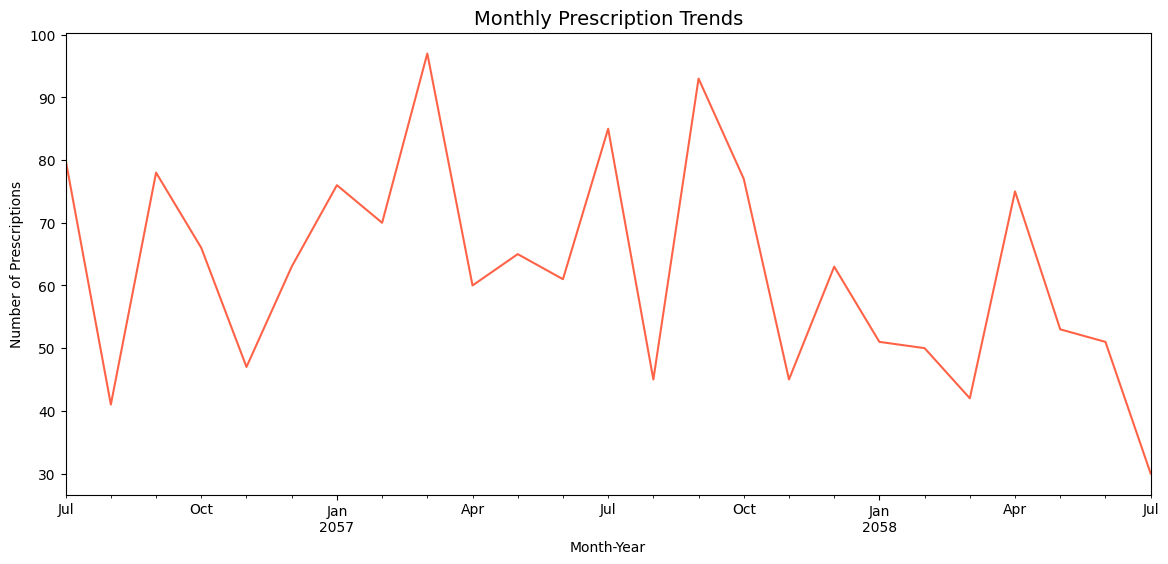

In [ ]:
# Set date as index for temporal analysis
data.set_index('DATE', inplace=True)

# Monthly prescription counts
monthly_prescriptions = data.resample('M').size()

# Plotting the temporal trend
plt.figure(figsize=(14,6))
monthly_prescriptions.plot(color='tomato')
plt.title('Monthly Prescription Trends', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Prescriptions')
plt.show()

# Resetting index for further analysis
data.reset_index(inplace=True)


<h3 style="color:#00008B;">🧑‍🤝‍🧑 Patient-Level Prescription Patterns</h3>
<p>Investigating how prescription behavior varies among patients, focusing on the number of prescriptions per individual.</p>


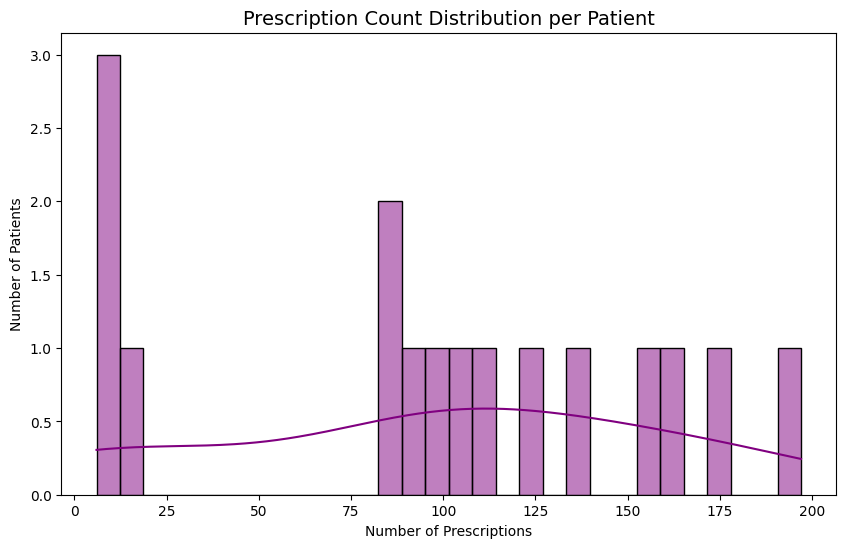

In [ ]:
# Number of prescriptions per patient
patient_counts = data['PATIENT_ID'].value_counts()

# Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(patient_counts, bins=30, kde=True, color='purple')
plt.title('Prescription Count Distribution per Patient', fontsize=14)
plt.xlabel('Number of Prescriptions')
plt.ylabel('Number of Patients')
plt.show()


<h3 style="color:#00008B;">🔗 Correlation Analysis</h3>
<p>Identifying correlations between numerical features such as prescription duration and dosage per day.</p>


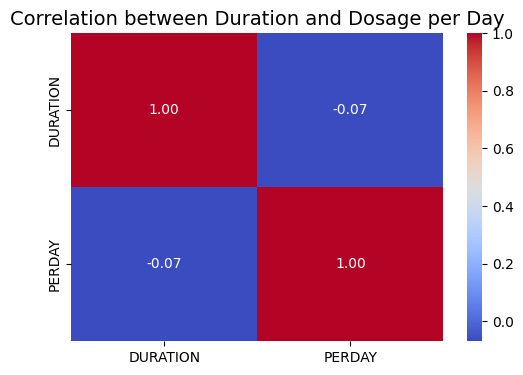

In [ ]:
corr_matrix = data[['DURATION', 'PERDAY']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Duration and Dosage per Day', fontsize=14)
plt.show()


<h3 style="color:#00008B;">🚨 Outlier Detection in Prescription Duration</h3>
<p>Using boxplots to visualize and detect potential outliers that could impact clustering accuracy.</p>


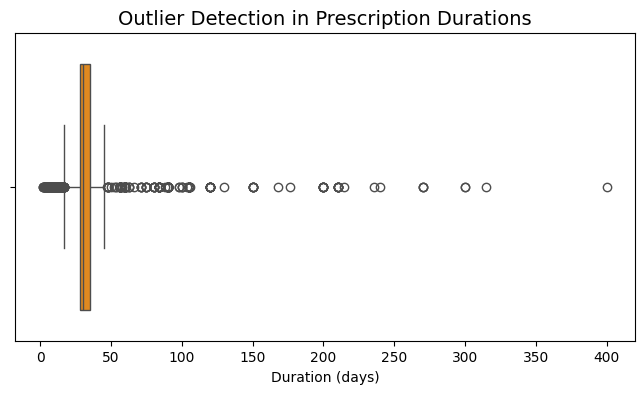

count    1564.000000
mean       38.339786
std        33.581154
min         2.000000
25%        28.000000
50%        30.000000
75%        35.377358
max       400.000000
Name: DURATION, dtype: float64

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['DURATION'], color='darkorange')
plt.title('Outlier Detection in Prescription Durations', fontsize=14)
plt.xlabel('Duration (days)')
plt.show()

data['DURATION'].describe()


<h2>🚨 Additional Outlier Detection (Boxplots) </h2>

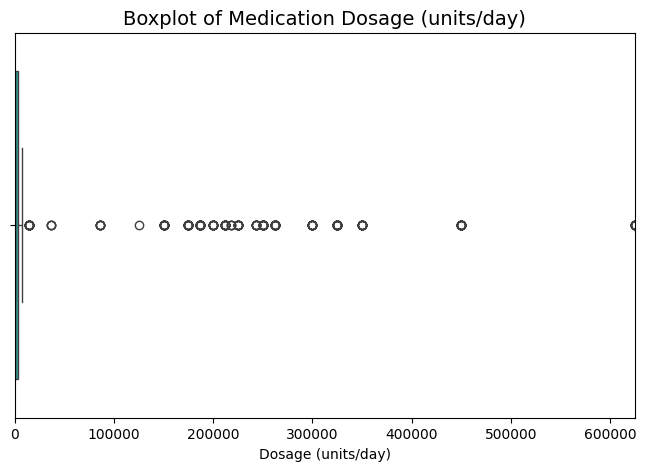

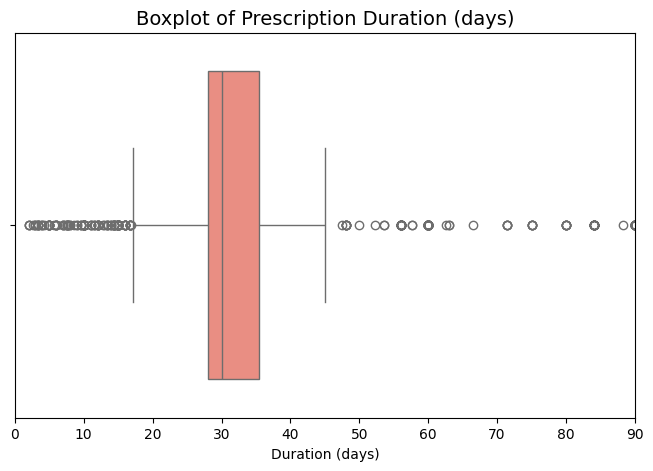

In [34]:
# Outlier Detection for Dosage per Day
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['PERDAY'], color='lightseagreen')
plt.title('Boxplot of Medication Dosage (units/day)', fontsize=14)
plt.xlabel('Dosage (units/day)')
plt.xlim(0, data['PERDAY'].quantile(0.95))
plt.show()

# Outlier Detection for Prescription Duration
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['DURATION'], color='salmon')
plt.title('Boxplot of Prescription Duration (days)', fontsize=14)
plt.xlabel('Duration (days)')
plt.xlim(0, data['DURATION'].quantile(0.95))
plt.show()


<h2 style="color:#4B0082;">📌 EDA Summary and Insights</h2>
<ul>
    <li>Prescription durations show a wide distribution, indicating diverse prescribing behaviors.</li>
    <li>Dominant medication categories suggest targeted areas for further analysis.</li>
    <li>Clear temporal trends and distinct patient-level prescription patterns provide valuable insights for subsequent clustering analysis.</li>
</ul>
<p>These results provide the groundwork needed for implementing the Sessa Empirical Estimator (SEE) using K-Means and DBSCAN in the subsequent notebook sections.</p>
